# DEODE training
## Simple plotting of 2D fields 

In [1]:
# Personal info
username = 'nknt'
path_to_exercises = f'/home/{username}/deode/DE330_Training_2024/Exercises/'
path_to_domain = f'/perm/{username}/git/github/natalieth/deode/develop/deode/data/config_files/include/domains/DEMO_60x80_2500m.toml'

In [2]:
# load some useful libraries 
import os,sys
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import toml
import warnings
from datetime import datetime,time
warnings.filterwarnings('ignore')

# local libraries
sys.path.append(f'{path_to_exercises}Plot')
from mapping import setup_map,setup_map_subplots

Assuming you've managed to do a simulation with all three CSC's we can now load some data. 

In [3]:
####### runs #######
d_alar = f'/ec/res4/scratch/{username}/deode/CY48t3_ALARO/archive/'
d_arom = f'/ec/res4/scratch/{username}/deode/CY48t3_AROME/archive/'
d_harm = f'/ec/res4/scratch/{username}/deode/CY46h1_HARMONIE_AROME/archive/'

In [4]:
####### Domain #######
f_domain = toml.load(path_to_domain)
domain = {'nx': f_domain['nimax'], 'ny': f_domain['njmax'],'name': f_domain['name'],'ezone':11}

In [20]:
####### read 2m Temperature during one time #######

init_time = datetime(2023,9,16,0)
lead_time = time(hour = 5, minute = 00) # offset from the model run time

ft2_alar =xr.open_dataset(d_alar+f"{init_time.year:04d}/{init_time.month:02d}/{init_time.day:02d}/{init_time.hour:02d}/GRIBPFDEOD{domain['name']}+{(lead_time.hour):04d}h{lead_time.minute:02d}m00s",
                            engine='cfgrib',backend_kwargs={'filter_by_keys':{'stepType': 
                                            'instant','shortName': '2t'}})

ft2_arom =xr.open_dataset(d_arom+f"{init_time.year:04d}/{init_time.month:02d}/{init_time.day:02d}/{init_time.hour:02d}/GRIBPFDEOD{domain['name']}+{(lead_time.hour):04d}h{lead_time.minute:02d}m00s",
                            engine='cfgrib',backend_kwargs={'filter_by_keys':{'stepType': 
                                            'instant','shortName': '2t'}})
ft2_harm =xr.open_dataset(d_harm+f"{init_time.year:04d}/{init_time.month:02d}/{init_time.day:02d}/{init_time.hour:02d}/GRIBPFDEOD{domain['name']}+{(lead_time.hour):04d}h{lead_time.minute:02d}m00s",
                            engine='cfgrib',backend_kwargs={'filter_by_keys':{'stepType': 
                                            'instant','shortName': '2t'}})
dims = (domain['ny'],domain['nx'])
lon = np.reshape(np.array(ft2_arom.longitude),dims)
lat = np.reshape(np.array(ft2_arom.latitude),dims)
t2_alar = np.reshape(np.array(ft2_alar.t2m),dims)
t2_arom = np.reshape(np.array(ft2_arom.t2m),dims)
t2_harm = np.reshape(np.array(ft2_harm.t2m),dims)

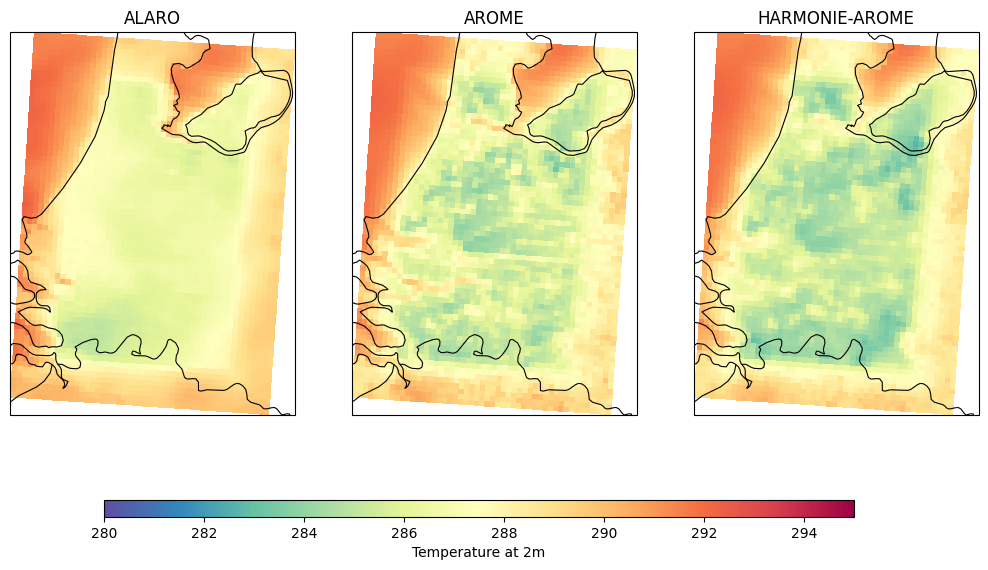

In [21]:
####### First plots #######
tmin = 280
tmax = 295
fig,ax = setup_map_subplots(1,3)
fig.set_size_inches(12.5, 8.5)
ax[0].set_title('ALARO')
im = ax[0].pcolormesh(lon,lat,t2_alar,vmin=tmin,vmax=tmax,cmap='Spectral_r',transform=ccrs.PlateCarree())
ax[1].set_title('AROME')
im = ax[1].pcolormesh(lon,lat,t2_arom,vmin=tmin,vmax=tmax,cmap='Spectral_r',transform=ccrs.PlateCarree())
ax[2].set_title('HARMONIE-AROME')
im = ax[2].pcolormesh(lon,lat,t2_harm,vmin=tmin,vmax=tmax,cmap='Spectral_r',transform=ccrs.PlateCarree())
cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.02])
cbar=fig.colorbar(im, cax=cbar_ax,orientation='horizontal',label='Temperature at 2m')